# Thesis Figures for Uniform Distribution

## Setup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path

convert thesis `\textwidth` of 418 pt to inches

In [2]:
width = 418 / 72.27

set theme for thesis

In [3]:
sns.set_theme('paper', 'ticks', rc={"text.usetex": True, "font.family": "serif"})

set path for figures and read `csv` to get a `DataFrame`

In [4]:
figs = Path('../../figs')

In [5]:
df = pd.read_csv("../../data/beta.csv", comment='#', converters={"rates": lambda x: np.fromstring(x[1:-1], dtype=int, sep=' ')})

## Prepare `DataFrame`

In [6]:
df['n'] = df['rates'].apply(len)

In [7]:
df['h'] = df['rates'].apply(np.sum)

In [8]:
df['cycle-end'] = df['cycle-start'] + df['cycle-length']

In [9]:
df['norm_backlog'] = df['backlog'] / df['h']

In [10]:
df['norm_rates'] = df['rates'] / df['h']

In [11]:
df['norm_rates_str'] = df['norm_rates'].astype("string")

In [12]:
df['diff-backlog'] = df.groupby(by='norm_rates_str', group_keys=False)['norm_backlog'].apply(lambda x: x - x.min())

In [13]:
df['diff-cycle-start'] = df.groupby(by='norm_rates_str', group_keys=False)['cycle-start'].apply(lambda x: x - x.min())

In [14]:
df['diff-cycle-length'] = df.groupby(by='norm_rates_str', group_keys=False)['cycle-length'].apply(lambda x: x - x.min())

In [15]:
df['best-backlog'] = df['diff-backlog'] == 0

## Figures

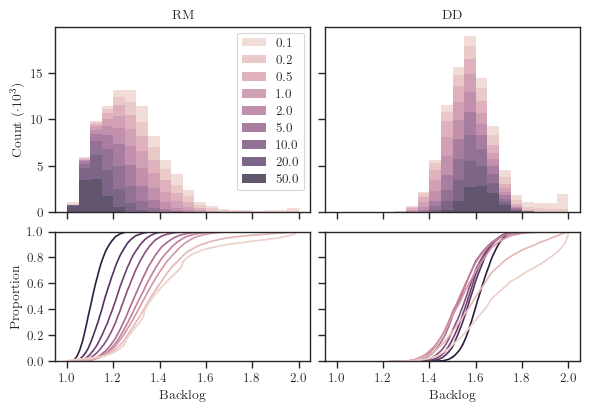

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(width, 4), height_ratios=(1, .7), sharex=True, sharey='row', layout='constrained')
bins = np.arange(21) / 20 + 1
sns.histplot(data=df[df['strategy'] == 'RM'], x='norm_backlog', hue='alpha', hue_norm=mpl.colors.LogNorm(), multiple='stack', linewidth=0, bins=bins, ax=ax1)
sns.histplot(data=df[df['strategy'] == 'DD'], x='norm_backlog', hue='alpha', hue_norm=mpl.colors.LogNorm(), multiple='stack', linewidth=0, bins=bins, legend=False, ax=ax2)
sns.ecdfplot(data=df[df['strategy'] == 'RM'], x='norm_backlog', hue='alpha', hue_norm=mpl.colors.LogNorm(), legend=False, ax=ax3)
sns.ecdfplot(data=df[df['strategy'] == 'DD'], x='norm_backlog', hue='alpha', hue_norm=mpl.colors.LogNorm(), legend=False, ax=ax4)
sns.move_legend(ax1, 'upper right')
ax1.get_legend().set(title=False)
ax1.set(title='RM', ylabel='Count ($\cdot 10^3$)')
ax1.yaxis.set_major_formatter(lambda x, pos: int(x/1000))
ax2.set(title='DD', ylabel='Strategy')
ax3.set(xlabel='Backlog')
ax4.set(xlabel='Backlog', ylabel=None)
plt.savefig(figs / 'beta-distribution-backlog.pdf')

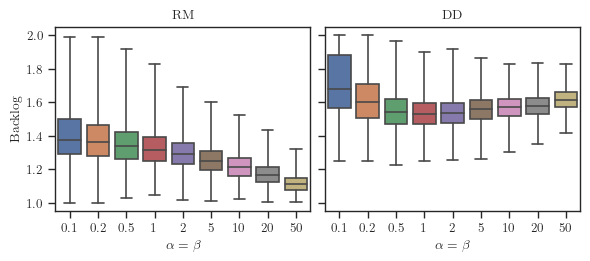

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(width, 2.5), layout='constrained', sharey=True)
sns.boxplot(data=df[df['strategy'] == 'RM'], x='alpha', y='norm_backlog', whis=(0, 100), ax=ax1)
sns.boxplot(data=df[df['strategy'] == 'DD'], x='alpha', y='norm_backlog', whis=(0, 100), ax=ax2)
for ax in (ax1, ax2):
    ax.set_xticklabels([0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50])
ax1.set(xlabel=r'$\alpha=\beta$', ylabel='Backlog', title='RM')
ax2.set(xlabel=r'$\alpha=\beta$', ylabel=None, title='DD')
plt.savefig(figs / 'beta-alpha-backlog.pdf')

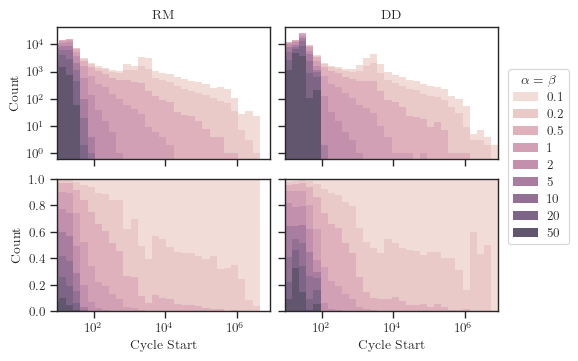

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(width-.82, 3.5), layout='constrained', sharex=True, sharey='row')
sns.histplot(data=df[df['strategy'] == 'RM'], x='cycle-start', hue='alpha', hue_norm=mpl.colors.LogNorm(), log_scale=True, multiple='stack', linewidth=0, bins=30, ax=ax1)
sns.histplot(data=df[df['strategy'] == 'DD'], x='cycle-start', hue='alpha', hue_norm=mpl.colors.LogNorm(), log_scale=True, multiple='stack', linewidth=0, bins=30, legend=False, ax=ax2)
sns.histplot(data=df[df['strategy'] == 'RM'], x='cycle-start', hue='alpha', hue_norm=mpl.colors.LogNorm(), log_scale=True, multiple='fill', linewidth=0, bins=30, legend=False, ax=ax3)
sns.histplot(data=df[df['strategy'] == 'DD'], x='cycle-start', hue='alpha', hue_norm=mpl.colors.LogNorm(), log_scale=True, multiple='fill', linewidth=0, bins=30, legend=False, ax=ax4)
ax1.set(yscale='log')
handles = ax1.get_legend().legendHandles
legend = fig.legend(handles, [.1, .2, .5, 1, 2, 5, 10, 20, 50], title=r'$\alpha=\beta$', loc='lower left', bbox_to_anchor=(1, .3))
ax1.get_legend().remove()
ax1.set(title='RM', yticks=[1, 10, 100, 1000, 10000])
ax2.set(title='DD')
ax3.set(xlabel='Cycle Start')
ax4.set(xlabel='Cycle Start')
plt.savefig(figs / 'beta-distribution-cycle.pdf', bbox_extra_artists=(legend,), bbox_inches='tight')

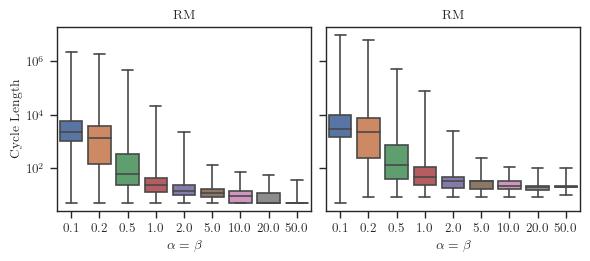

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(width, 2.5), layout='constrained', sharey=True)
sns.boxplot(data=df[df['strategy'] == 'RM'], x='alpha', y='cycle-length', whis=(0,100), ax=ax1)
sns.boxplot(data=df[df['strategy'] == 'DD'], x='alpha', y='cycle-length', whis=(0,100), ax=ax2)
ax1.set(xlabel=r'$\alpha=\beta$', ylabel='Cycle Length', yscale='log', title='RM')
ax2.set(xlabel=r'$\alpha=\beta$', ylabel=None, title='RM')
plt.savefig(figs / 'beta-alpha-cycle.pdf')